In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pickle


In [31]:
#Charger le dataset prétraité
df = pd.read_csv("../data/spam_clean.csv")  # ton dataset déjà prétraité
print(df.head())

  Category                                            Message
0      ham  go jurong point crazi avail bugi n great world...
1      ham                              ok lar joke wif u oni
2     spam  free entri wkli comp win fa cup final tkt st m...
3      ham                u dun say earli hor u c alreadi say
4      ham               nah think goe usf live around though


In [37]:
# Séparer X et y
X = df['Message']
y = df['Category']


In [38]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assurer qu'il n'y a pas de valeurs manquantes
X_train = X_train.fillna("")
X_test = X_test.fillna("")

# Initialiser le vectorizer
vectorizer = TfidfVectorizer()

# Transformer les textes en vecteurs
X_train_vect = vectorizer.fit_transform(X_train)  # apprend le vocabulaire sur le train
X_test_vect = vectorizer.transform(X_test)        # transforme le test avec le même vocabulaire

# Vérification
print("Shape X_train_vect :", X_train_vect.shape)
print("Shape X_test_vect :", X_test_vect.shape)



Shape X_train_vect : (4457, 5654)
Shape X_test_vect : (1115, 5654)


In [46]:
#définir les modèles
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": LinearSVC()
}


In [47]:
results = {}

for name, model in models.items():
    model.fit(X_train_vect, y_train)
    y_pred = model.predict(X_test_vect)
    
    acc = accuracy_score(y_test, y_pred)
    results[name] = {
        "model": model,
        "accuracy": acc,
        "report": classification_report(y_test, y_pred, output_dict=True),
        "y_pred": y_pred
    }
    
    print(f"==== {name} ====")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


==== Naive Bayes ====
Accuracy: 0.9677
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       966
        spam       0.99      0.77      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115

==== Logistic Regression ====
Accuracy: 0.9686
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       0.99      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115

==== SVM ====
Accuracy: 0.9874
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       966
        spam       0.99      0.91      0.95       149

    accuracy                           0.99      1115
   macro av

In [48]:
# Comparaison des Accuracy
for name, res in results.items():
    print(f"{name}: Accuracy = {res['accuracy']:.4f}")


Naive Bayes: Accuracy = 0.9677
Logistic Regression: Accuracy = 0.9686
SVM: Accuracy = 0.9874


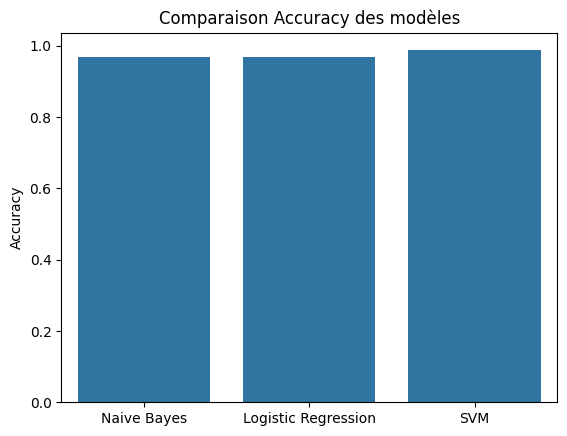

In [49]:
acc_values = [res['accuracy'] for res in results.values()]
model_names = list(results.keys())

sns.barplot(x=model_names, y=acc_values)
plt.title("Comparaison Accuracy des modèles")
plt.ylabel("Accuracy")
plt.show()


Meilleur modèle : SVM


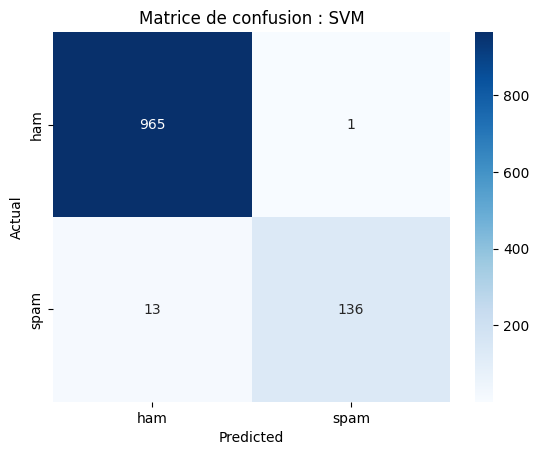

Précision, rappel, F1-score par classe :
ham:
  Precision: 0.9867
  Recall   : 0.9990
  F1-score : 0.9928
spam:
  Precision: 0.9927
  Recall   : 0.9128
  F1-score : 0.9510


In [51]:
# Choisir le modèle avec la meilleure accuracy
best_model_name = max(results, key=lambda k: results[k]['accuracy'])
best_model = results[best_model_name]['model']
y_pred_best = results[best_model_name]['y_pred']

print(f"Meilleur modèle : {best_model_name}")

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['ham','spam'], yticklabels=['ham','spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Matrice de confusion : {best_model_name}")
plt.show()

# Analyse détaillée
report = results[best_model_name]['report']
print("Précision, rappel, F1-score par classe :")
for label in ['ham','spam']:
    print(f"{label}:")
    print(f"  Precision: {report[label]['precision']:.4f}")
    print(f"  Recall   : {report[label]['recall']:.4f}")
    print(f"  F1-score : {report[label]['f1-score']:.4f}")


In [52]:
#Sauvegarder le meilleur modèle et le vectorizer
with open("../models/best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

with open("../models/vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

print("\nLe meilleur modèle et le vectorizer ont été sauvegardés dans le dossier 'models/'.")


Le meilleur modèle et le vectorizer ont été sauvegardés dans le dossier 'models/'.
